In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = "/content/archive (2).zip"

# Destination folder to extract
extract_to = "/content/data"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Optional: List the extracted files
os.listdir(extract_to)


['fraudTest.csv', 'fraudTrain.csv']

In [ ]:
import pandas as pd

# STEP 1: Load the dataset (adjust path if needed)
df = pd.read_csv('/content/data/fraudTest.csv')  # or 'fraudTrain.csv' depending on your file

# View first 5 rows
print("First 5 rows:")
print(df.head())

# Basic info
print("\nShape of data:", df.shape)
print("\nData types and nulls:")
print(df.info())

# Count of missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check class balance
print("\nFraud class distribution:")
print(df['is_fraud'].value_counts())

# Percentage of fraud cases
fraud_ratio = df['is_fraud'].mean()
print(f"\nFraud ratio: {fraud_ratio:.6f} (~1 in {int(1/fraud_ratio)} cases)")


First 5 rows:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union 

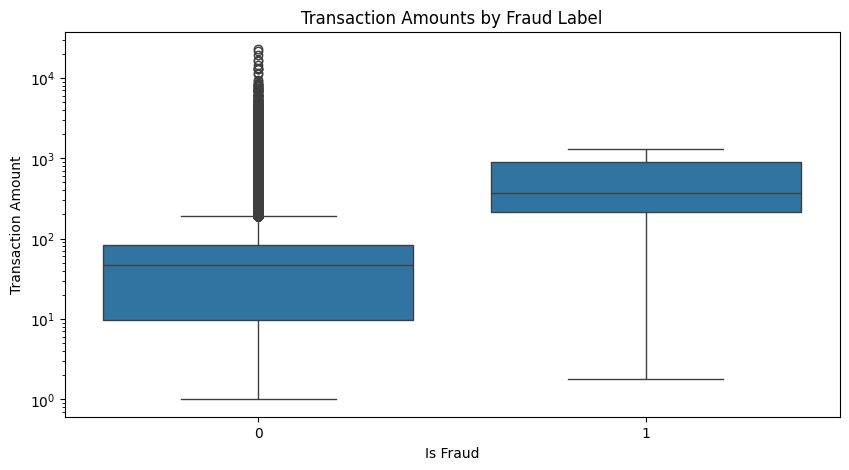

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare amount for fraud vs non-fraud
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='is_fraud', y='amt')
plt.title('Transaction Amounts by Fraud Label')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # use log scale to handle outliers
plt.show()


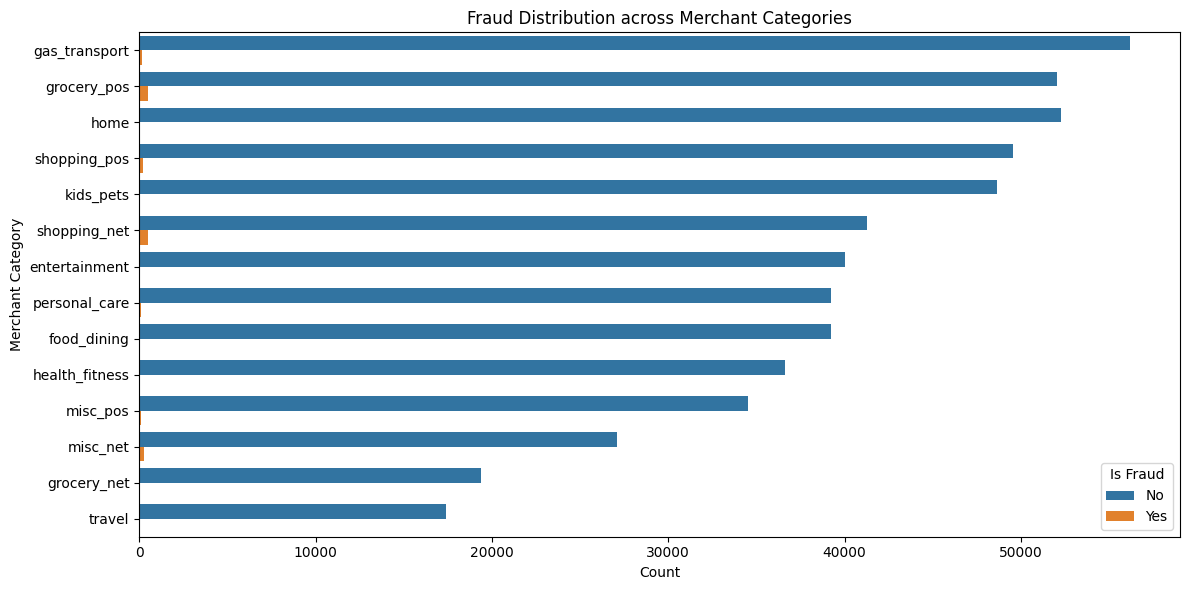

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', hue='is_fraud', order=df['category'].value_counts().index)
plt.title('Fraud Distribution across Merchant Categories')
plt.xlabel('Count')
plt.ylabel('Merchant Category')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


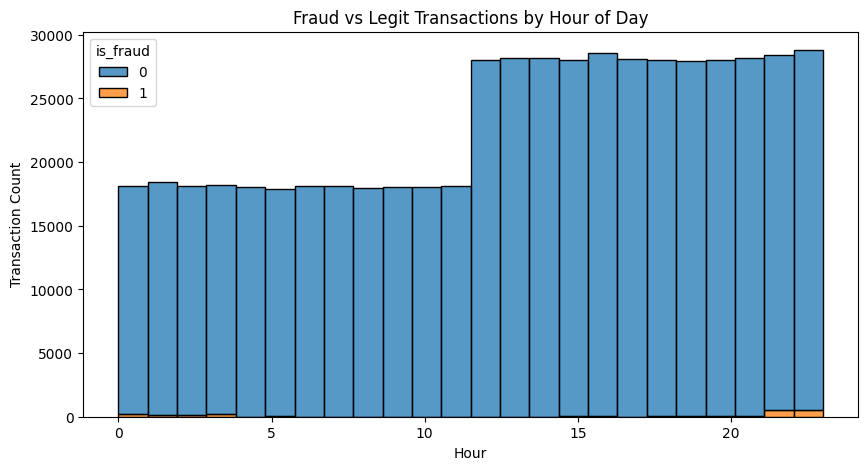

In [ ]:
# Convert timestamp to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# Plot fraud vs hour
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', hue='is_fraud', bins=24, multiple='stack')
plt.title('Fraud vs Legit Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.show()


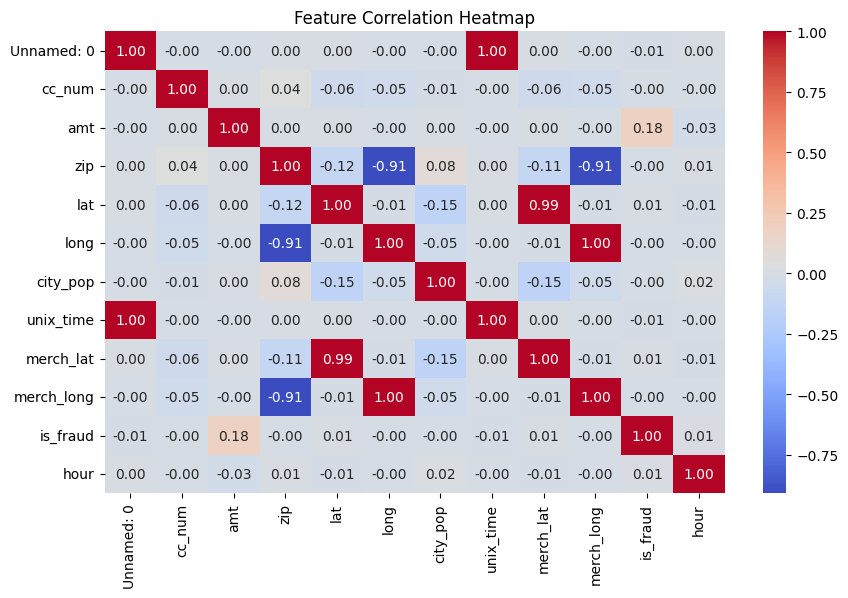

In [ ]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include='number')  # only numeric features
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Choose features (you can customize this list)
features = ['amt', 'merch_lat', 'merch_long', 'hour']  # add more if needed
X = df[features]
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Training set fraud ratio:", y_train.mean())
print("Test set fraud ratio:", y_test.mean())


Training set fraud ratio: 0.003859866164314233
Test set fraud ratio: 0.003859857482185273


In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc

# Class weight = 'balanced' handles imbalance
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_probs = clf.predict_proba(X_test)[:, 1]
y_preds = clf.predict(X_test)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_preds))


PR-AUC: 0.1401

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    110715
           1       0.06      0.74      0.11       429

    accuracy                           0.95    111144
   macro avg       0.53      0.85      0.54    111144
weighted avg       1.00      0.95      0.97    111144



In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['weekday'] = df['trans_date_trans_time'].dt.weekday


In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.Timestamp('now') - df['dob']).dt.days // 365


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])


In [ ]:
features = ['amt', 'merch_lat', 'merch_long', 'hour', 'day', 'weekday', 'age', 'category_encoded']
X = df[features]
y = df['is_fraud']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Fraud ratio in training:", y_train.mean())
print("Fraud ratio in test:", y_test.mean())


Fraud ratio in training: 0.003859866164314233
Fraud ratio in test: 0.003859857482185273


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, auc

# Train model with class weights to handle imbalance
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # get probability of class 1 (fraud)
y_preds = model.predict(X_test)


In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f"\n✅ PR-AUC: {pr_auc:.4f}")  # >= 0.75 is your target
print("\nClassification Report:\n", classification_report(y_test, y_preds))



✅ PR-AUC: 0.8672

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.96      0.66      0.78       429

    accuracy                           1.00    111144
   macro avg       0.98      0.83      0.89    111144
weighted avg       1.00      1.00      1.00    111144



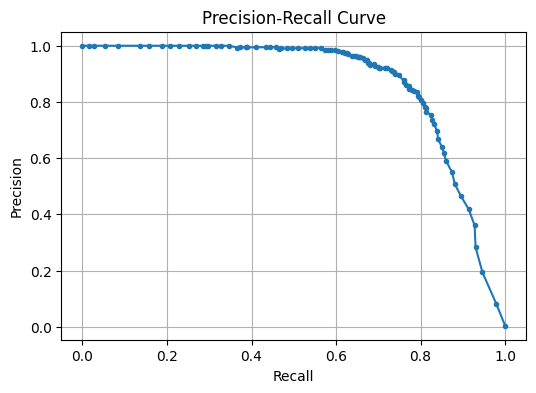

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [ ]:
import joblib
model = joblib.load("model.pkl")


In [ ]:
import joblib

# Load the model
loaded_model = joblib.load('model.pkl')

# Predict again
y_pred = loaded_model.predict(X_test)


In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = "/content/archive (3).zip"

# Destination folder to extract
extract_to = "/content/data"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Optional: List the extracted files
os.listdir(extract_to)


['annotations.xml',
 'fraudTest.csv',
 'images',
 'receipts.csv',
 'fraudTrain.csv',
 'boxes']

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pytesseract
print("Tesseract version:", pytesseract.get_tesseract_version())


Tesseract version: 4.1.1


In [ ]:
import os
print(os.path.exists('/content/images/fake_receipt1.jpg'))


False


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os

# Make sure image folder exists
os.makedirs("/content/images", exist_ok=True)

def create_fake_receipt(path, merchant="Store ABC", total=123.45):
    img = Image.new('RGB', (600, 300), color='white')
    draw = ImageDraw.Draw(img)

    try:
        font = ImageFont.truetype("DejaVuSans-Bold.ttf", 28)
    except:
        font = None  # fallback to default

    draw.text((20, 20), merchant, fill=(0, 0, 0), font=font)
    draw.text((20, 70), "Thank you for shopping!", fill=(0, 0, 0), font=font)
    draw.text((20, 130), f"Total: ${total:.2f}", fill=(0, 0, 0), font=font)
    draw.text((20, 180), "Visit Again!", fill=(0, 0, 0), font=font)

    img.save(path)

# Generate again
create_fake_receipt("/content/images/fake_receipt1.jpg", "Pizza Palace", 340.75)


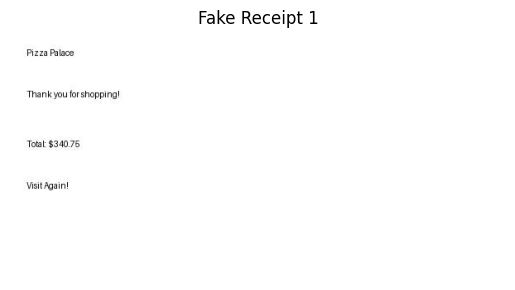

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/images/fake_receipt1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Fake Receipt 1")
plt.axis('off')
plt.show()


In [ ]:
import pytesseract
import cv2

# Load and process the image
image_path = '/content/images/fake_receipt1.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Extract text using pytesseract
text = pytesseract.image_to_string(gray)

# Print the raw OCR output
print("🔍 OCR Output:\n", text)


🔍 OCR Output:
 Pizza Palace

Thank you forshopping!

Totat $340.75

Visit Again!



In [ ]:
def parse_ocr_text(text):
    lines = [line.strip() for line in text.split('\n') if line.strip()]
    merchant_name = lines[0] if lines else None
    total = None

    for line in lines[::-1]:  # reverse search
        if 'total' in line.lower():
            # Extract any number with dot, possibly after $
            match = re.search(r'[$]?(\d+[.,]?\d{2})', line.replace(',', '').replace('O', '0'))
            if match:
                try:
                    total = float(match.group(1).replace(',', '').replace('O', '0'))
                except:
                    continue
                break

    return merchant_name, total

merchant, amount = parse_ocr_text(text)
print(f"\n Fixed Extraction:\nMerchant: {merchant}\nTotal: {amount}")



 Fixed Extraction:
Merchant: Pizza Palace
Total: None


In [ ]:
from PIL import Image, ImageDraw, ImageFont

def create_fake_receipt(path, merchant="Store ABC", total=123.45):
    img = Image.new('RGB', (600, 300), color='white')
    draw = ImageDraw.Draw(img)

    try:
        font = ImageFont.truetype("DejaVuSans-Bold.ttf", 36)  # larger font
    except:
        font = None

    draw.text((20, 20), merchant, fill=(0, 0, 0), font=font)
    draw.text((20, 80), "Thank you for shopping!", fill=(0, 0, 0), font=font)
    draw.text((20, 140), f"Total 340.75", fill=(0, 0, 0), font=font)  # no dollar sign
    draw.text((20, 200), "Visit Again!", fill=(0, 0, 0), font=font)

    img.save(path)

# Overwrite old receipt
create_fake_receipt("/content/images/fake_receipt1.jpg", "Pizza Palace", 340.75)


In [ ]:
img = cv2.imread('/content/images/fake_receipt1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(gray)
print("🔍 OCR Output:\n", text)


🔍 OCR Output:
 Pizza Palace

‘Thank you for shopping!

“Total 340.75:

Visit Again!



In [ ]:
merchant, amount = parse_ocr_text(text)
print(f"\n Extracted:\nMerchant: {merchant}\nTotal: {amount}")


NameError: name 're' is not defined

In [ ]:
!pip install fastapi uvicorn python-multipart
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import os
print(os.path.exists("/content/images/fake_receipt1.jpg"))


True


In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save using joblib instead of pickle
joblib.dump(model, 'model.pkl')


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-19' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    s

['model.pkl']

In [ ]:
!pip install fastapi uvicorn nest_asyncio pyngrok
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from pyngrok import conf
conf.get_default().auth_token = "2z8ienerI3MWoomtKRytk45oM4r_41r3Z8vTcGzRLm2aLUpRo"


In [ ]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pytesseract
import cv2
import pandas as pd
import re

# Load your trained model
model = joblib.load("model.pkl")

# Function to extract text from receipt image
def extract_text_from_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return pytesseract.image_to_string(gray)

# Function to extract merchant and total amount
def parse_ocr_text(text):
    lines = [line.strip() for line in text.split('\n') if line.strip()]
    merchant_name = lines[0] if lines else None
    total = None
    for line in lines[::-1]:
        if 'total' in line.lower():
            match = re.search(r'[$]?(\d+[.,]?\d{2})', line.replace(',', '').replace('O', '0'))
            if match:
                try:
                    total = float(match.group(1).replace(',', '').replace('O', '0'))
                except:
                    continue
                break
    return merchant_name, total

# FastAPI app
app = FastAPI()

# Expected JSON input format
class TransactionRequest(BaseModel):
    transaction: dict
    receipt_path: str

# Prediction endpoint
@app.post("/score")
def score(input: TransactionRequest):
    try:
        X = pd.DataFrame([input.transaction])
        fraud_prob = model.predict_proba(X)[0][1]
        text = extract_text_from_image(input.receipt_path)
        merchant_name, total_amount = parse_ocr_text(text)
        return {
            "fraud_score": round(fraud_prob, 4),
            "merchant_name": merchant_name,
            "total_amount": total_amount
        }
    except Exception as e:
        return {"error": str(e)}


Overwriting main.py


In [ ]:
from pyngrok import ngrok
import nest_asyncio
import uvicorn

nest_asyncio.apply()
ngrok.kill()

public_url = ngrok.connect(8000)
print(f"🚀 API is live at: {public_url}/docs")

uvicorn.run("main:app", host="0.0.0.0", port=8000)


🚀 API is live at: NgrokTunnel: "https://5c86-35-199-180-181.ngrok-free.app" -> "http://localhost:8000"/docs


INFO:     Started server process [7272]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     182.190.216.64:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     182.190.216.64:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     182.190.216.64:0 - "POST /score HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [7272]
